# Flight Ticket Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [3]:
#Train dataset
df_train=pd.read_csv("flight_ticket_Data_Train.csv",parse_dates=['Date_of_Journey'], sep=",")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Test dataset
df_test=pd.read_csv("flight_ticket_Test_set.csv",parse_dates=['Date_of_Journey'], sep=",")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,2019-06-03,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
#Combining train and test datasets
flight_df=df_train.append(df_test, 'sort=True')
flight_df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR ? DEL,Banglore,non-stop
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU ? IXR ? BBI ? BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL ? LKO ? BOM ? COK,Delhi,2 stops
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU ? NAG ? BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR ? NAG ? DEL,Banglore,1 stop
...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,20:25 07 Jun,2019-06-06,20:30,Banglore,23h 55m,NaN,CCU ? DEL ? BLR,Kolkata,1 stop
13350,No info,IndiGo,16:55,2019-03-27,14:20,Banglore,2h 35m,NaN,CCU ? BLR,Kolkata,non-stop
13351,No info,Jet Airways,04:25 07 Mar,2019-06-03,21:50,Cochin,6h 35m,NaN,DEL ? BOM ? COK,Delhi,1 stop
13352,No info,Air India,19:15,2019-06-03,04:00,Cochin,15h 15m,NaN,DEL ? BOM ? COK,Delhi,1 stop


In [6]:
flight_df.drop(['Additional_Info'],axis=1,inplace=True)
flight_df.drop(['Dep_Time'],axis=1,inplace=True)

In [7]:
#Check for null values
flight_df.isnull().sum()

Airline               0
Arrival_Time          0
Date_of_Journey       0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

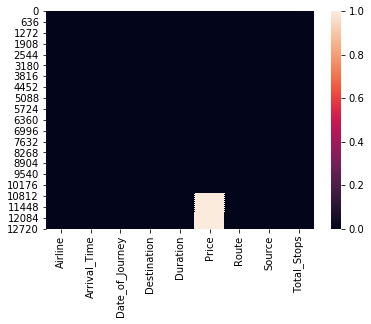

In [8]:
#check for null values again
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(flight_df.isnull())
plt.show()

In [9]:
#Removing null values from dataset
flight_df.replace(np.NaN, 0, inplace=True)

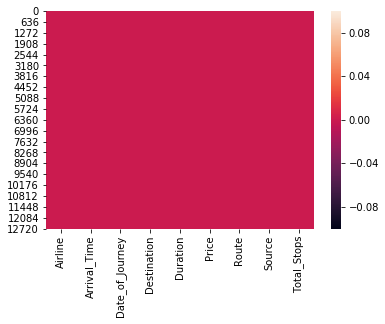

In [10]:
#check for null values again
sns.heatmap(flight_df.isnull())
plt.show()

In [11]:
flight_df_doj=pd.DataFrame()
flight_df_doj['month']=flight_df['Date_of_Journey'].dt.month_name()
flight_df_doj['year']=flight_df['Date_of_Journey'].dt.year
flight_df_doj['day']=flight_df['Date_of_Journey'].dt.day_name()
flight_df_doj['Price']=flight_df['Price']
flight_df_doj

,month,year,day,Price
0,March,2019,Sunday,3897.0
1,January,2019,Saturday,7662.0
2,September,2019,Friday,13882.0
3,December,2019,Thursday,6218.0
4,January,2019,Thursday,13302.0
...,...,...,...,...
13349,June,2019,Thursday,0.0
13350,March,2019,Wednesday,0.0
13351,June,2019,Monday,0.0
13352,June,2019,Monday,0.0


In [12]:
#check no.of unique year
flight_df_doj['year'].drop_duplicates()

0    2019
Name: year, dtype: int64

In [13]:
flight_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

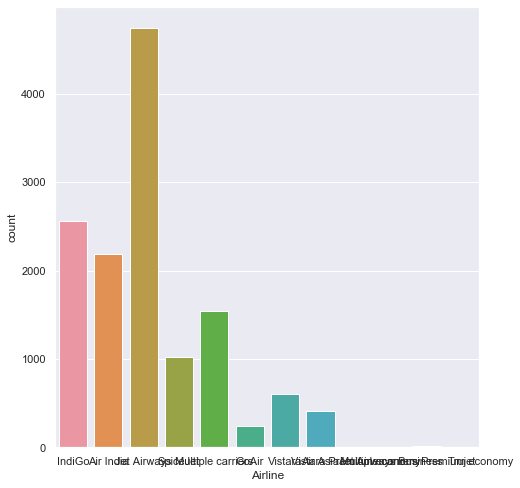

In [14]:
#plot comparing airlines and their flights' count
sns.set(rc={'figure.figsize':(7.6,8.10)})
sns.countplot(flight_df['Airline'])

In [15]:
flight_df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [16]:
flight_df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [17]:
#filght count between source and destination
pd.crosstab(flight_df['Source'],flight_df['Destination'])
#flight count max for route Delhi->Cochin

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1582,0,0,1170
Chennai,0,0,0,0,456,0
Delhi,0,5682,0,0,0,0
Kolkata,3581,0,0,0,0,0
Mumbai,0,0,0,883,0,0


In [18]:
#max flight price
flight_df.loc[flight_df['Price'].idxmax()]

Airline            Jet Airways Business
Arrival_Time                      11:25
Date_of_Journey     2019-01-03 00:00:00
Destination                   New Delhi
Duration                         5h 40m
Price                             79512
Route                   BLR ? BOM ? DEL
Source                         Banglore
Total_Stops                      1 stop
Name: 2924, dtype: object

In [19]:
#making new column day_type to check flights during weekday or weekend
flight_df_doj['day_type']=np.where((flight_df_doj['day']=='Sunday')|(flight_df_doj['day']=='Saturday'),'weekend','weekday')
flight_df_doj

,month,year,day,Price,day_type
0,March,2019,Sunday,3897.0,weekend
1,January,2019,Saturday,7662.0,weekend
2,September,2019,Friday,13882.0,weekday
3,December,2019,Thursday,6218.0,weekday
4,January,2019,Thursday,13302.0,weekday
...,...,...,...,...,...
13349,June,2019,Thursday,0.0,weekday
13350,March,2019,Wednesday,0.0,weekday
13351,June,2019,Monday,0.0,weekday
13352,June,2019,Monday,0.0,weekday


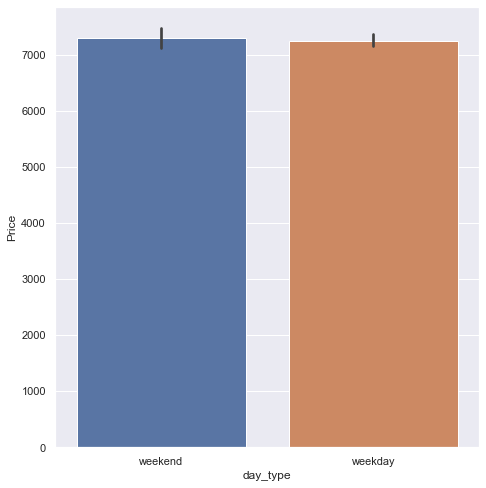

In [20]:
sns.barplot(x='day_type',y='Price',data=flight_df_doj)
plt.show()

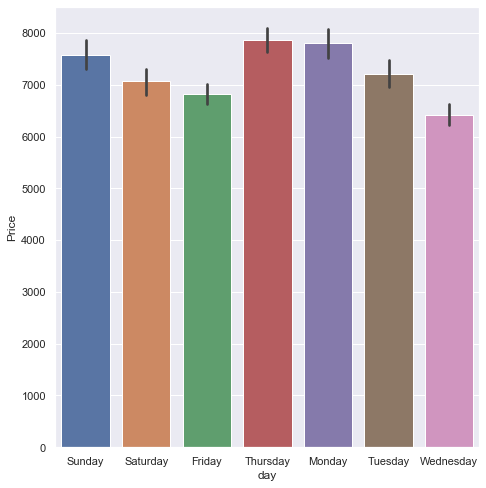

In [21]:
sns.barplot(x='day',y='Price',data=flight_df_doj)
plt.show()

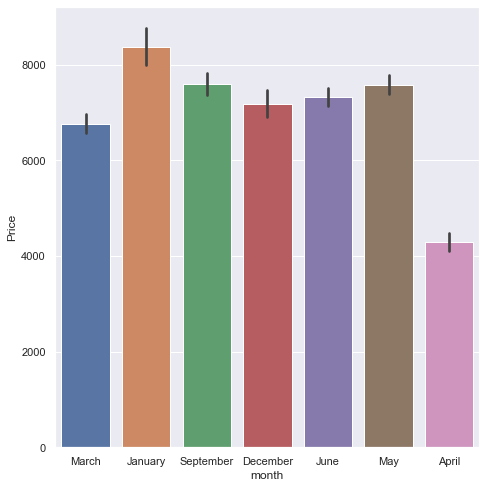

In [22]:
sns.barplot(x='month',y='Price',data=flight_df_doj)
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Total_Stops','Source','Destination','Airline']
for val in list1:
    flight_df[val]=le.fit_transform(flight_df[val].astype(str))

In [24]:
flight_df.drop(['Date_of_Journey'],axis=1,inplace=True)
flight_df.drop(['Duration'],axis=1,inplace=True)
flight_df.drop(['Arrival_Time'],axis=1,inplace=True)
flight_df

,Airline,Destination,Price,Route,Source,Total_Stops
0,3,5,3897.0,BLR ? DEL,0,5
1,1,0,7662.0,CCU ? IXR ? BBI ? BLR,3,2
2,4,1,13882.0,DEL ? LKO ? BOM ? COK,2,2
3,3,0,6218.0,CCU ? NAG ? BLR,3,1
4,3,5,13302.0,BLR ? NAG ? DEL,0,1
...,...,...,...,...,...,...
13349,1,0,0.0,CCU ? DEL ? BLR,3,1
13350,3,0,0.0,CCU ? BLR,3,5
13351,4,1,0.0,DEL ? BOM ? COK,2,1
13352,1,1,0.0,DEL ? BOM ? COK,2,1


In [25]:
#Converting all categorical values into numerical
import pandas as pd
flight_df=pd.get_dummies(flight_df)
flight_df

,Airline,Destination,Price,Source,Total_Stops,Route_0,Route_BLR ? AMD ? DEL,Route_BLR ? BBI ? DEL,Route_BLR ? BDQ ? DEL,Route_BLR ? BOM ? AMD ? DEL,...,Route_DEL ? LKO ? BOM ? COK,Route_DEL ? LKO ? COK,Route_DEL ? MAA ? BOM ? COK,Route_DEL ? MAA ? COK,Route_DEL ? NAG ? BOM ? COK,Route_DEL ? PNQ ? COK,Route_DEL ? RPR ? NAG ? BOM ? COK,Route_DEL ? TRV ? COK,Route_DEL ? UDR ? BOM ? COK,Route_MAA ? CCU
0,3,5,3897.0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,7662.0,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,13882.0,2,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,0,6218.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,5,13302.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13350,3,0,0.0,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13351,4,1,0.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13352,1,1,0.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#separating input and target variables
df_x=flight_df.drop(columns=['Price'])
y=pd.DataFrame(flight_df['Price'])

In [27]:
#Scaling input variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print()
    print()
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [29]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42  is:  -1.4751969261074978e+23
r2_score corresponding to random state:  43  is:  -6.871249090249214e+25
r2_score corresponding to random state:  44  is:  -2.702206605499899e+27
r2_score corresponding to random state:  45  is:  -1.0311233208460115e+28
r2_score corresponding to random state:  46  is:  -8.722493908732682e+21
r2_score corresponding to random state:  47  is:  -8.734972223842176e+26
r2_score corresponding to random state:  48  is:  -2.012528520577186e+21
r2_score corresponding to random state:  49  is:  -1.7487107342989959e+28
r2_score corresponding to random state:  50  is:  -3.2818835409384427e+26
r2_score corresponding to random state:  51  is:  -1.109045169883298e+23
r2_score corresponding to random state:  52  is:  -2.3112204840890803e+26
r2_score corresponding to random state:  53  is:  -9.444639489536332e+26
r2_score corresponding to random state:  54  is:  -5.2385117526535925e+26
r2_score corresponding to random state:  55  

In [30]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  -5.7644688996052846e+26
Standard Deviation in r2 score for Linear Regression:  8.405902576588414e+26


In [31]:
#Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [32]:
#Check r2 score for Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state:  42  is:  0.22152223789491954
r2_score corresponding to random state:  43  is:  0.23585089706775164
r2_score corresponding to random state:  44  is:  0.23360673830267886
r2_score corresponding to random state:  45  is:  0.24485729725161587
r2_score corresponding to random state:  46  is:  0.251097325045913
r2_score corresponding to random state:  47  is:  0.23659356763923456
r2_score corresponding to random state:  48  is:  0.21397784710648926
r2_score corresponding to random state:  49  is:  0.2197590166176724
r2_score corresponding to random state:  50  is:  0.2492839227344371
r2_score corresponding to random state:  51  is:  0.2407730091317759
r2_score corresponding to random state:  52  is:  0.20497671300795617
r2_score corresponding to random state:  53  is:  0.22317156676590177
r2_score corresponding to random state:  54  is:  0.22074760431131368
r2_score corresponding to random state:  55  is:  0.24040155107665373
r2_score corresponding to

In [33]:
#Calculate mean r2 score and std deviation in r2 score for Lasso Regresssion
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.20327955513079776
standard deviation in r2 score for Lasso Regression:  0.1020777795593174


In [34]:
#Let's save Linear regression with random state corresponding to r2 score 99
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 99, test_size = 0.30)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [35]:
#Calculate RMSE and r2 score
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.138905601529251e+17
r2_score is:  -1.5246198754617296e+27


In [36]:
#Saving the linear regression model
from joblib import dump, load
dump(lreg, 'Flight_Ticket_Price.joblib')

['Flight_Ticket_Price.joblib']